## Case Study: How Can a Wellness Technology Company Play It Smart?

[Case Study description](#1)   
[Business Task](#2)  
[1. Ask](#3)  
[2. Prepare](#4)  
[3. Process](#5)  
[4. Analyze](#6)  
[5. Share](#7)  
[6. Act](#8)  

<a id="1"></a> <br>
###  Case Study description

Bellabeat is a high-tech manufacturer of health-focused products for women. Collecting data on activity, sleep, stress, and reproductive health empowers women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

The purpose of the case study is to analyze smart device fitness data to gain insight into how consumers use their smart devices. The insights will help unlock new growth opportunities for the company.
 

<a id="2"></a> <br>
### Business Task

Analyze data from the FitBit fitness tracker to see how users interact with the FitBit app and determine trends to guide marketing strategy for the company. 

<a id="3"></a> <br>
### 1. Ask

The first step in the data analysis process is to ask the right questions. 

Who are the main stakeholders in this project and what are their expectations? 

The following stakeholders are involved in this project: 
*  Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
*  Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
*  Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

What is the problem you are trying to solve?
How can your insights drive business decisions?

Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Analyzing fitness smart device will help to unlock new growth opportunities for the company.
Identified trends will help to draw up high-level recommendations for Bellabeat’s marketing strategy. 

 **Key questions:**
1. What are some of the trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

<a id="4"></a> <br>
### 2. Prepare


The data used for the project is freely accessible public data from Kaggle generated by responders to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. This Kaggle data set  [FitBit Fitness Tracker Data ](https://www.kaggle.com/datasets/arashnic/fitbit)contains personal fitness tracker from thirty Fitbit users who signed the consent to share the personal tracker data, including daily activity, steps, and heart rate. 
The data is stored in 18 csv files and organized in wide format.


**Data integrity and credibility**

This data has limitations. The data was collected in 2016, seven years ago, and may not be actual and accurate. Since then, people's behavior, physical activity, diet, sleeping and health habits may change.  Seven years is also a significant period in scientific and technological progress (today devices can work two or three weeks without recharging, mobility and almost imperceptibility on the hand, a widget for quick synchronization etc.) which could also change usage habits. 

Number of participants may not be representative of the general female population.

It is important to also consider other factors such as age, overall physical activity, diet, family history, and other health conditions when assessing an individual's overall health status. Consulting with a healthcare provider can help provide personalized recommendations for improving health and managing any potential health risks.

The integrity and validity of the data are incomplete to provide Bellabeat with reliable insights and business suggestions. Thus, the following analysis can only give the first ideas and directions, which need to be verified by analyzing more extensive and up-to-date data.


**ROCCC system to determine that data is Reliable, Original, Comprehensive, Current, and Cited.**


* Reliable — LOW — 30 responders are a small sample size and does not accurately reflect the entire population of female Fitbit users. 
* Original — LOW — Amazon Mechanical Turk is Third party data provider.
* Comprehensive — LOW — The dataset does not consist of data about gender, age, health conditions and it is not random. The data is biased against women. Low accuracy does not represent the case objectively.
* Current — LOW — 7-year-old data is not present
* Cited — LOW — Data obtained from an unidentified third party (Amazon Mechanical Murk)

<a id="5"></a> <br>
###  3. Process

The following analysis will be focused on three datasets: "dailyActivity_merged" "sleepDay_merged", "weightLogInfo_merged.csv" to identify trends in user data.
​
The processes of data cleaning, manipulation, analysis, and visualization will be performed in RStudio. 

In [ ]:
## Setting up my R environment by loading packages and libraries
install.packages("tidyverse")
install.packages("skimr")
install.packages("here")
install.packages("janitor")
install.packages("ggplot2") 
install.packages("lubridate")
install.packages("dplyr")             
install.packages("sqldf")
install.packages("plotrix")

library(tidyverse)
library(skimr)
library(here)
library(janitor)
library(ggplot2)  
library(lubridate)
library(dplyr)              
library(sqldf)
library(plotrix)



In [ ]:
##Importing data files in R
daily_activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_day <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_info_log <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Let's Take a closer look at each dataset:

In [ ]:
##Invoke a spreadsheet-style data viewer within RStudio
View(daily_activity)
View(sleep_day)
View(weight_info_log)

##Take a closer look at each dataset 
head(daily_activity)
head(sleep_day)
head(weight_info_log)

##Display columns and dataset structure 
str(daily_activity)
str(sleep_day)
str(weight_info_log)


**Cleaning data**  
Before the analysis the data must be checked  for duplicates, misspellings, missing values, errors.

weight_info data frame has missing values. To show just records with filled values we can remove the whole column “Fat” as there is no information for the insights or we can display all columns without “Fat” column.

In [ ]:
#Fixing N/A values in the weight_info dataframe
weight_info <- weight_info_log %>% 
  select(Id, Date, WeightKg, WeightPounds, BMI, IsManualReport, LogId)
View(weight_info)

In [ ]:
#Counting number of rows in each dataset 
nrow(daily_activity)
nrow(sleep_day)
nrow(weight_info)

There are 940 rows in the daily_activity dataset, 413 rows in the sleep_day and 67 rows in the weight_info dataset

In [ ]:
#Checking for duplicate rows
nrow(daily_activity[duplicated(daily_activity),])
nrow(sleep_day[duplicated(sleep_day),])
nrow(weight_info[duplicated(weight_info),])


From this there are 3 duplicate rows found in the sleep_day dataset. Let's remove them. 

In [ ]:
#Removing duplicate rows 
sleep_day <- unique(sleep_day)
nrow(sleep_day)

For sleep_day and weight_info dataframes we will use separte() function to split date and time into separate columns. 

In [ ]:
#Using separate() function function to split date and time into separate columns in the sleep_day and weight_info dataframes
sleep_day_new <- sleep_day %>% 
  separate(SleepDay, c("Date", "Time"), " ")
View(sleep_day_new)

weight_info_new <- weight_info %>%
  separate(Date, c("Date", "Time"), " ")
View(weight_info_new)  


Change data type from char to date format in each dataframe for the future analysis and check how data type changed. 

In [ ]:
#Change data type from char to date format
daily_activity$ActivityDate = as.Date(daily_activity$ActivityDate, "%m/%d/%Y") 
View(daily_activity)

sleep_day_new$Date = as.Date(sleep_day_new$Date, "%m/%d/%Y") 
View(sleep_day_new)

weight_info_new$Date = as.Date(weight_info_new$Date,"%m/%d/%Y") 
View(weight_info_new)


#Check how data type changed
glimpse(daily_activity)
glimpse(sleep_day_new)
glimpse(weight_info_new)


Define the number of unique users by id with n_distinct() function



In [ ]:
#Define the number of unique rows by Id column
n_distinct(daily_activity$Id)
n_distinct(sleep_day_new$Id)
n_distinct(weight_info_new$Id)

From this we defined that there are: 33 unique responders in the daily_activity  dataframe, 24 unique responders in the sleep_day_new  and only 8 unique responders in the weight_info_new dataframe.

<a id="6"></a> <br>
###  4. Analyze

The best way to represent a set of numbers and see the central trend of the entire data set is to find the central value, the mean using summary() function. 

In [ ]:
# daily_activity dataset summary 
daily_activity %>% 
  select(TotalSteps,
         TotalDistance,
         VeryActiveMinutes,
         FairlyActiveMinutes,
         LightlyActiveMinutes,
         SedentaryMinutes,
         Calories) %>% 
  summary()

#sleep_day_new dataframe summary

sleep_day_new %>% 
  select(TotalSleepRecords,
         TotalMinutesAsleep,
         TotalTimeInBed) %>% 
  summary() 

#weight_info_new dataframe summary

weight_info %>% 
  select(WeightKg,
         WeightPounds,
         BMI) %>%  
  summary()


**Observations and conclusions for each dataset based on the summary**  

**Daily Activity dataset**  

Observations:  

- An average user walks 5.490 km or 7638 steps a day. The CDC recommend that most adults aim for 10,000 steps per day. For most people, this is the equivalent of about 8 kilometers, or 5 miles.
- An average user spends 991.2 minutes or 16.52 hours in 24-hour movement sedentarily. A little physical movement while awake, up to 10 hours a day without movement, can increase the risk of chronic diseases, including high cholesterol, blood pressure. Adults are advised to limit sedentary time to 8 hours or less.

- The average calories burned daily are 2304 kCal. The appropriate number of calories burned per day varies depending on factors such as age, gender, weight, height, and activity level.

- The average of highly active minutes spent is 21.16 minutes, which is less then at least 30 minutes per day exercising intentionally. 
 
Conclusions:  

- Responders are sedentary throughout the day in general
- Responders spend their time mostly inactive rather than very active or active.
- Responders spend a small amount of time doing exercises.


**Sleep Per Day:**  

Observations:  

- The average number total sleep time is 419 minutes, or around 7 hours.
- The average time spent in bed is 458 minutes or 7 hours 30 min.
- Users record sleep at least once a daily in average

Conclusions:  

- Responders in average spent 30 minutes in bed awake 
- Participants get enough sleep on average
- Most of participants sleep once per day 


**Weight Log Info Dataset:**  

Observations:  

- The average BMI is 25.19, which is significantly higher than normal 
       BMI range (18 – 24.9).
- The average weight is 72 kg, or 158.8 pounds.

There are only 8 responders shared their weight data. There is no data on users' age, height, or body fat percentage to draw conclusions about health.

Conclusions:    

- None of the participants are underweight
- The average height of responders is 169 cm 
- According to the CDC, a person with a BMI between 25 and 29.9 is considered overweight.


<a id="7"></a> <br>
### 5. Share

**Identifying trends and relationships**  


**Frequency of use of the FitBit during the week**  

I used Google spreadsheet tool to define the day of week for each day in ActivityDay column. 

 =switch(WEEKDAY(B2),1,"Sunday",2,"Monday",3,"Tuesday",4,
"Wednesday",5, "Thursday",6,"Friday",7,"Saturday")

Now we can count how many times each day of the week appeared in the table, and based on this information, create a bar chart showing the percentage of FitBit usage during the week.

=COUNTIF(C:C, "Monday")

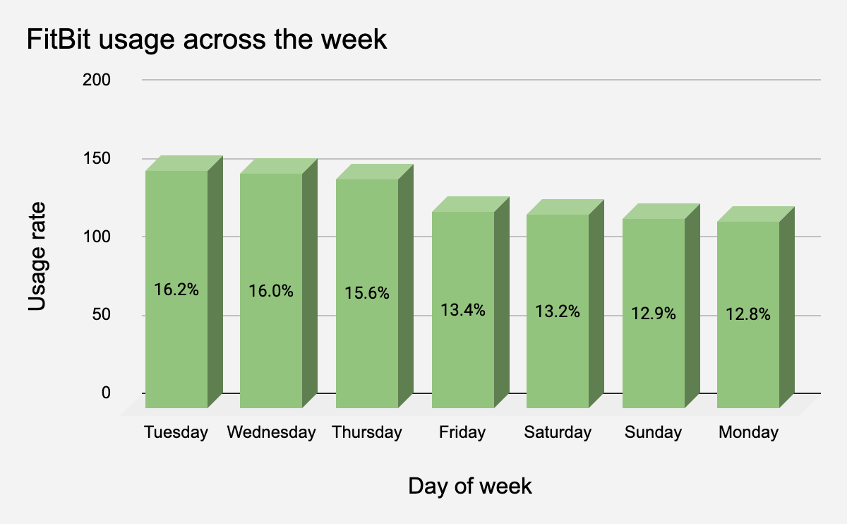

According to the bar chart people are more active on Tuesday, Wednesday, and Thursday. Tuesday is the most popular day of the week to work out.
In the middle of the week, people have the highest motivation for activity.
On Monday an average person goes through the day's activities lacking motivation and productivity that’s why the percentage is the lowest - 12.8 %. 

**Relationship between sleep and sedentary time**

In [ ]:
#Determining the correlation between sleep and sedentary time
#Merge two dataframes: daily_activity, sleep_day_new, using composite key.

sleep_sedentary_correlation <- merge(daily_activity, sleep_day_new, by.x = c("Id", "ActivityDate"), by.y = c("Id", "Date"))
sleep_sedentary_cor <- subset(sleep_sedentary_correlation, select = c("Id", "ActivityDate", "TotalTimeInBed", "TotalMinutesAsleep", "SedentaryMinutes"))

View(sleep_sedentary_cor)


In [ ]:
ggplot(data= sleep_sedentary_cor, aes(x=SedentaryMinutes, y=TotalMinutesAsleep)) + 
  geom_point(colour="Chocolate1") + geom_smooth(color = "cadetblue4")+
  labs(title="Correlation Between Sedentary Time and Time Asleep", x="Sedentary Time (minutes)", y="Time Asleep (minutes)")


The scatter plot above shows that between 0- 1500 sedentary minutes total time asleep decreases with increasing sedentary time.

In [ ]:
#calculate the correlation index between sedentary time and time asleep
cor(sleep_sedentary_cor$SedentaryMinutes, sleep_sedentary_cor$TotalMinutesAsleep)


Value of -0.6 indicating a negative correlation (one variable increases as the other decreases) between total time asleep and sedatives minutes.

**Correlation between total steps and calories burned**

In [ ]:
#Determining the correlation between total steps and calories 

ggplot(data= daily_activity, aes(x=TotalSteps, y=Calories)) + 
  geom_point(color="Chocolate1") + 
  geom_smooth(color = "cadetblue4")+
  labs(title="Relationship Between Steps and Calories", x="Steps", y="Calories burned")



According to the scatterplot, there is an obvious positive correlation between the total number of steps and calories: the more steps taken the greater number of calories burned.

**Minutes spent in different activity levels**

In [ ]:
Sedentary <- sum(daily_activity$SedentaryMinutes)
Lightly <- sum(daily_activity $LightlyActiveMinutes)
Fairly <- sum(daily_activity $FairlyActiveMinutes)
Active <- sum(daily_activity $VeryActiveMinutes)

activity_minutes <- c(Sedentary,Lightly, Fairly, Active)

# calculate the percentage of active minutes for each level of activity
activity_percent <- round(activity_minutes/sum(activity_minutes)*100,1)

# create a pie chart showing the percentage of active minutes for each level of activity

legend_labels <- c("Sedentary","Lightly Active", "Fairly Active","Very Active")
pie3D(activity_percent, labels=paste0(activity_percent,"%"), main="Percentage of Active Minutes by Activity Level", col=c("aquamarine3","khaki1", "darkorange3","lightblue"), border="lightgrey", labelcex = 0.9)
legend("topright", legend_labels, cex=0.8, fill=c("aquamarine3","khaki1", "darkorange3","lightblue"))


The pie chart provides a quick and easy-to-read summary of the percentage of minutes spent in different activity levels, which could be helpful for understanding the overall activity patterns of the participants.

The pie chart indicates that sedentary minutes account for a high percentage of all minutes (81.3%), what might be related to Desk jobs (office jobs), screen time (spending more time in front of screens, whether it's for work or leisure), lifestyle habits (reading or watching movies), using cars and other transportations a lot. This can lead to a sedentary lifestyle and can be a major contributor to the high percentage of sedentary minutes

**Sleep time vs Time in bed**



In [ ]:
# Creating a plot 
ggplot(data= sleep_day_new, aes(x= TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point(color="Chocolate3") + 
  geom_smooth(color = "cadetblue4")+
  labs(title="Sleep time vs Time in bed ", x="Time asleep (minutes)", y="Total time in bed (minutes)")


The scatterplot displays a positive correlation between sleep time and time spent in bed. Bellabeat can motivate users to go to bed earlier to get adequate amount of sleep and good quality of sleep. 

 By tracking sleep, users can explore their sleep patterns and make some adjustments to their sleep habits. Going to bed earlier can regulate sleep schedule. As soon as individual “sleep need” is determined, it will be easier to wake up naturally at the right time every morning which will lead to better overall health and well-being.

**Exploring the day with the highest number of minutes asleep**

In [ ]:
# Create new column with day of the week
sleep_day_new$DayOfWeek <- weekdays(sleep_day_new$Date)

# View the updated data frame
View(sleep_day_new)


In [ ]:
#Defining the day with the highest sleeping time

sleep_day_new %>%
  group_by(DayOfWeek) %>%
  summarize(total_minutes_asleep = sum(TotalMinutesAsleep)) %>%
  arrange(desc(total_minutes_asleep)) %>%
  head(1)


In [ ]:
#Create a visual showing the total number of minutes asleep for each day of the week    

sleep_day_new %>%
  group_by(DayOfWeek) %>%
  summarize(total_minutes_asleep = sum(TotalMinutesAsleep)) %>%
  mutate(percent_of_total = round(total_minutes_asleep / sum(total_minutes_asleep) * 100, 1)) %>%
  ggplot(aes(x = DayOfWeek, y = total_minutes_asleep)) +
  geom_col(fill = "cadetblue4") +
  geom_text(aes(label = paste0(percent_of_total, "%")), vjust = -0.5) +
  labs(x = "Day of Week", y = "Total Minutes Asleep", 
       title = "Total Minutes Asleep by Day of Week")



The bar chart shows that Wednesday is the day with the highest total minutes of sleep. This information can be useful in understanding sleep patterns and identifying factors that may affect sleep quality on different days of the week.

<a id="8"></a> <br>
###  6. Act

In the last section of this case study, I will provide observations and suggestions based on the analysis.  
To do this, I will return to key questions.
What are some of the trends in smart device usage?

1) Based on the analysis and calculation of unique users, responders most often use the FitBit to track their daily activity levels and calories burned, fewer people for sleep control and very few report information about weight.

2) User in average spends approximately 16.5 hours in 24-hour movement sedentarily.  

3) Responders spend their time mostly inactive rather than very active or active and spend small amount of time doing exercises.

4) An average user walks 5.5 kilometers a day, this could be considered a moderately active lifestyle. The CDC recommend that most adults aim for 10,000 steps per day. For most people, this is the equivalent of about 8 kilometers, or 5 miles.

5) The average number of total time asleep is approximately 7 hours. This would fall within the range of recommended sleep duration for adults, which is typically 7-9 hours per night.

6) There is a strong negative correlation (-0.6) between total time asleep and sedentary minutes. The longer the sedentary time, the stronger the association with poor sleep quality and duration.

7) Lack of physical activity during the day can lead to increased levels of stress and anxiety, which can make it more difficult to fall asleep at night. Additionally, a sedentary lifestyle can lead to a decrease in overall energy expenditure, which can contribute to feelings of fatigue and daytime sleepiness.

8) An average BMI of 25.19 falls within the overweight range according to the World Health Organization (WHO) classification.  

9) Tuesday is the most popular day for work outs.  

10) There is a strong correlation between total steps taken and calories burned.  

11) Saturday is the day users get the most sleep in a week.


How could trends apply to Bellabeat customers?
How could these trends help influence Bellabeat marketing strategy?

By leveraging trends and focusing on the unique needs and behaviors users, Bellabeat could tailor its marketing strategy to better meet the needs of its target audience and help them achieve their fitness and wellness goals.

1) Promote active lifestyle: Given that users spend a significant amount of time sedentary and are not very active, Bellabeat could focus on promoting the benefits of an active lifestyle.   

2) Incorporating some of the features that can be a great way to encourage more physical activity and walking:  

- goal setting (target to encourage users to aim for 10,000 steps per day or more), receiving reminders throughout the day to reach those goals

- gamification elements, such as challenges or rewards, reminders, or alerts throughout the day to encourage them to take breaks from sedentary activities.  

- coaching and feedback features that can provide users with personalized recommendations for how to improve their activity levels.  

3) For improving the weight control experience successful marketing strategy should focus on promoting weight management features, such as calorie tracking and meal planning to help users achieve a healthy weight:  

- integration of a food diary: Bellabeat could partner with popular food tracking apps or create its own in-app diary to track and monitor food intake in addition to their physical activity for a comprehensive picture of overall calorie balance.  
 
- utilize personalized recommendations for healthy eating and exercise habits (suggest specific meal plans based on the user's dietary preferences or suggest targeted exercises to help meet specific weight loss goals). 

- Integrate community support: social features to allow users to connect with each other and offer support and motivation. This may include virtual challenges or competitions that encourage users to work towards a common goal or simply a platform for users to share their progress. 

- offer additional resources such as nutrition and fitness guides or access to certified dietitians or personal trainers. This can provide users with additional support and guidance to help them achieve their weight loss goals.  

- gamify the experience by creating challenges or goals that reward users for achieving specific milestones. 

4) Emphasize sleep tracking. Developing sleep tracking features and providing guidance on improving sleep quality, given the correlation observed between sedentary time and poor sleep quality.   

5) Bellabeat can encourage people to go to sleep earlier to get adequate amount and good quality of sleep by providing reminders and notifications:  

- set a bedtime reminder: Fitness trackers can be set to remind users to go to bed at a certain time each night. This can help establish a regular sleep schedule and promote healthier sleep habits.  

- monitor sleep patterns: Fitness trackers can track sleep patterns and provide insights into the quality and duration of sleep. 

- personalized recommendations for improving sleep habits. This might include suggestions for adjusting bedtime routines, reducing caffeine consumption, or increasing physical activity during the day.  

6) Knowing that Tuesday is a popular workout day, Bellabeat could provide personalized workout recommendations for users based on their fitness goals, offer Tuesday-specific workouts to encourage users to stick to their routine, create challenges or competitions specifically for Tuesdays to encourage users to work out and stay motivated.  

7) Since Saturday is the day users get the most sleep in a week, Bellabeat could offer tips and guidance to help users maintain good sleep habits throughout the week and improve sleep quality.  

8) Promote weight management: Given that very few users report weight-related information, Bellabeat could focus on promoting the benefits of weight management and highlight how its products can help users monitor and track their weight goals.  

